# 🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎
# 💻💻 COMPUTER VISION - FINAL PROJECT 💻💻
# 🏎🏎🏎🏎🏎🏎"⛐ Racing ⛐"🏎🏎🏎🏎🏎🏎
# 🏎🏎🏎 🤵:Shay Shtern 🆔: 205891294 🏎🏎🏎
# 🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎🏎

![Start](letstart.gif "letstart.gif")

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import sys
from IPython.display import Video

In [2]:
Video("P3_racing.mov")

In [3]:
# Take every 10th frame from the video
cap = cv2.VideoCapture('P3_racing.mov')
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
current = cap.get(cv2.CAP_PROP_POS_FRAMES)
duration = frame_count/fps
ret, F0 = cap.read()

frames_interval_10 = [F0]

while current < frame_count:
    for _ in range(10):
        ret, frame = cap.read()
        current = cap.get(cv2.CAP_PROP_POS_FRAMES)
    frames_interval_10.append(frame)    

cap.release() # release input video
# cv2.destroyAllWindows() # delete output window
# cv2.waitKey(1);

In [4]:
# Convert BGR img to RGB
def myBGR2RGB(myImage):
    myImage = myImage[:, :, ::-1]
    return myImage

frames_interval_10_RGB = []

for i in range(len(frames_interval_10)-1):
    frame = myBGR2RGB(frames_interval_10[i])
    frames_interval_10_RGB.append(frame)
len(frames_interval_10_RGB)

%xdel frames_interval_10

In [5]:
def Find_Matrix_Between_Frames(this_frame, next_frame):

    # Parameters for goodFeaturesToTrack
    feature_params = dict( maxCorners   = 1000,
                           qualityLevel = 0.001,
                           minDistance  = 10,
                           blockSize    = 5 )

    # Parameters for optical flow
    lk_params = dict( winSize  = (50,50), 
                      maxLevel = 5, 
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
 
    # Make frames gray
    this_frame_gray = cv2.cvtColor(this_frame, cv2.COLOR_RGB2GRAY)
    next_frame_gray = cv2.cvtColor(next_frame, cv2.COLOR_RGB2GRAY)
    
    #find good points to track     
    pts0 = cv2.goodFeaturesToTrack(this_frame_gray, mask = None, **feature_params)
    pts1, status, err = cv2.calcOpticalFlowPyrLK(this_frame_gray, next_frame_gray, pts0, None, **lk_params)

    #Delete bad points     
    pts0 = pts0[status[:,0]==1]
    pts1 = pts1[status[:,0]==1]

    #find Homography matrix
    H,_ = cv2.findHomography(pts1, pts0, cv2.RANSAC,5.0)

    return H

# Create Trasformation Matrices From 10➜0, 20➜10, 30➜20, ... ,1430➜1420 By Calculate Them:

In [6]:
start = time.time()

matrices = []
I = np.identity(3)
matrices.append(I)
for i in range (len(frames_interval_10_RGB)-1):
#     print("Calculate for frames",i*10,(i+1)*10)
    this_frame = frames_interval_10_RGB[i]
    next_frame = frames_interval_10_RGB[i+1]
    H = Find_Matrix_Between_Frames(this_frame, next_frame)
    matrices.append(H)
    
end = time.time()
print("It took",end - start,"seconds to calculate the matrices")

It took 11.08475375175476 seconds to calculate the matrices


In [7]:
print(len(matrices))
matrices[143]

144


array([[ 1.00433494e+00,  6.64382764e-03, -5.23362523e+00],
       [ 6.64828433e-03,  1.00615776e+00, -3.28164845e+01],
       [ 1.26315247e-06,  7.95129305e-06,  1.00000000e+00]])

In [8]:
matrices[0][0][2] = 500  #dx ➜  move the frame x - axis
matrices[0][1][2] = 3000 #dy ➜  move the frame y - axis
matrices[0]

array([[1.e+00, 0.e+00, 5.e+02],
       [0.e+00, 1.e+00, 3.e+03],
       [0.e+00, 0.e+00, 1.e+00]])

# Create Trasformation Matrices From Frame to Frame Like: 10➜0, 20➜0, 30➜0, … ,1430➜0: 

# For Example: 50➜0 Is the Matrices Multiplication:
# 50➜40 · 40➜30 · 30➜20 · 20➜10 · 10➜0

In [9]:
anyFrame_to_firstFrame_matrices = []

matrix_I = matrices[0]
matrix_10_0 = matrices[1]
anyFrame_to_firstFrame_matrices.append(np.dot(matrix_I,matrix_10_0))

# EXAMPLE:

# matrix_20_10 = matrices[2]
# anyFrame_to_firstFrame_matrices.append(np.dot(anyFrame_to_firstFrame_matrices[0], matrix_20_10))

# matrix_30_20 = matrices[3]
# anyFrame_to_firstFrame_matrices.append(np.dot(anyFrame_to_firstFrame_matrices[1], matrix_30_20))

# 🢂🢂🢂 ... 🢂🢂🢂 ... 🢂🢂🢂 ... 🢂🢂🢂 ... 🢂🢂🢂 ... 🢂🢂🢂 ... 🢂🢂🢂 ... 🢂🢂🢂

# matrix_1430_1420 = matrices[143]
# anyFrame_to_firstFrame_matrices.append(np.dot(anyFrame_to_firstFrame_matrices[141], matrix_1430_1420))

# matrix_1440_1430 = matrices[144]
# anyFrame_to_firstFrame_matrices.append(np.dot(anyFrame_to_firstFrame_matrices[142], matrix_1440_1430))

for i in range (2,len(matrices)):
    current_matrix = matrices[i]
    anyFrame_to_firstFrame_matrices.append(np.dot(anyFrame_to_firstFrame_matrices[i-2],current_matrix))
len(anyFrame_to_firstFrame_matrices)

143

In [10]:
# Size of the Panorama image
pano_shape = (2280, 3750)

In [11]:
#First transformation matrix to move the frames to buttom middle 
matrices[0]

array([[1.e+00, 0.e+00, 5.e+02],
       [0.e+00, 1.e+00, 3.e+03],
       [0.e+00, 0.e+00, 1.e+00]])

(3750, 2280, 3)


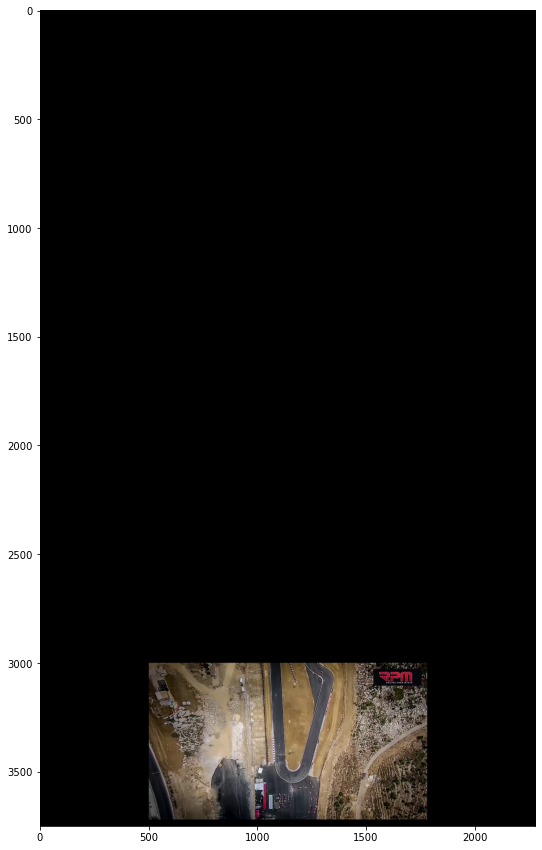

In [12]:
new_frame_0 = cv2.warpPerspective(frames_interval_10_RGB[0], matrices[0], pano_shape)
print(new_frame_0.shape)
plt.figure(figsize=(15,15))
plt.imshow(new_frame_0)

(3750, 2280, 3)


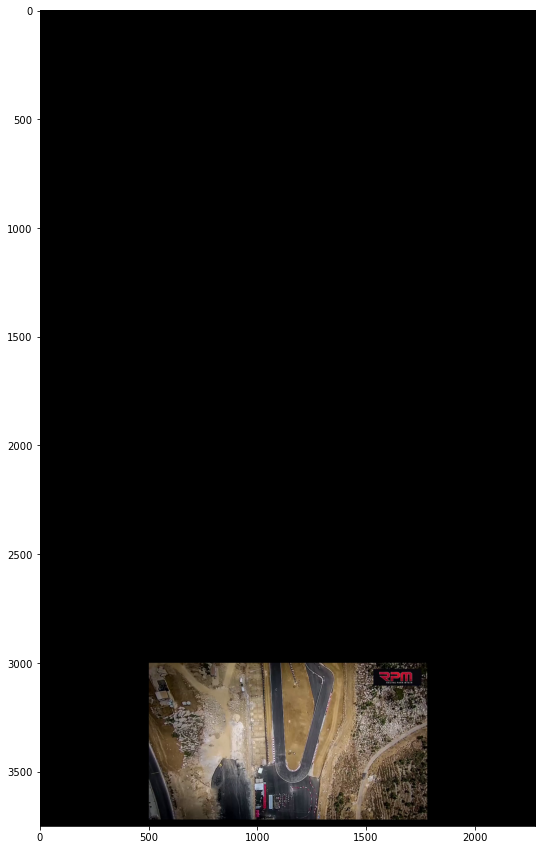

In [13]:
new_frame_10 = cv2.warpPerspective(frames_interval_10_RGB[1], anyFrame_to_firstFrame_matrices[0], pano_shape)
print(new_frame_10.shape)
plt.figure(figsize=(15,15))
plt.imshow(new_frame_10)

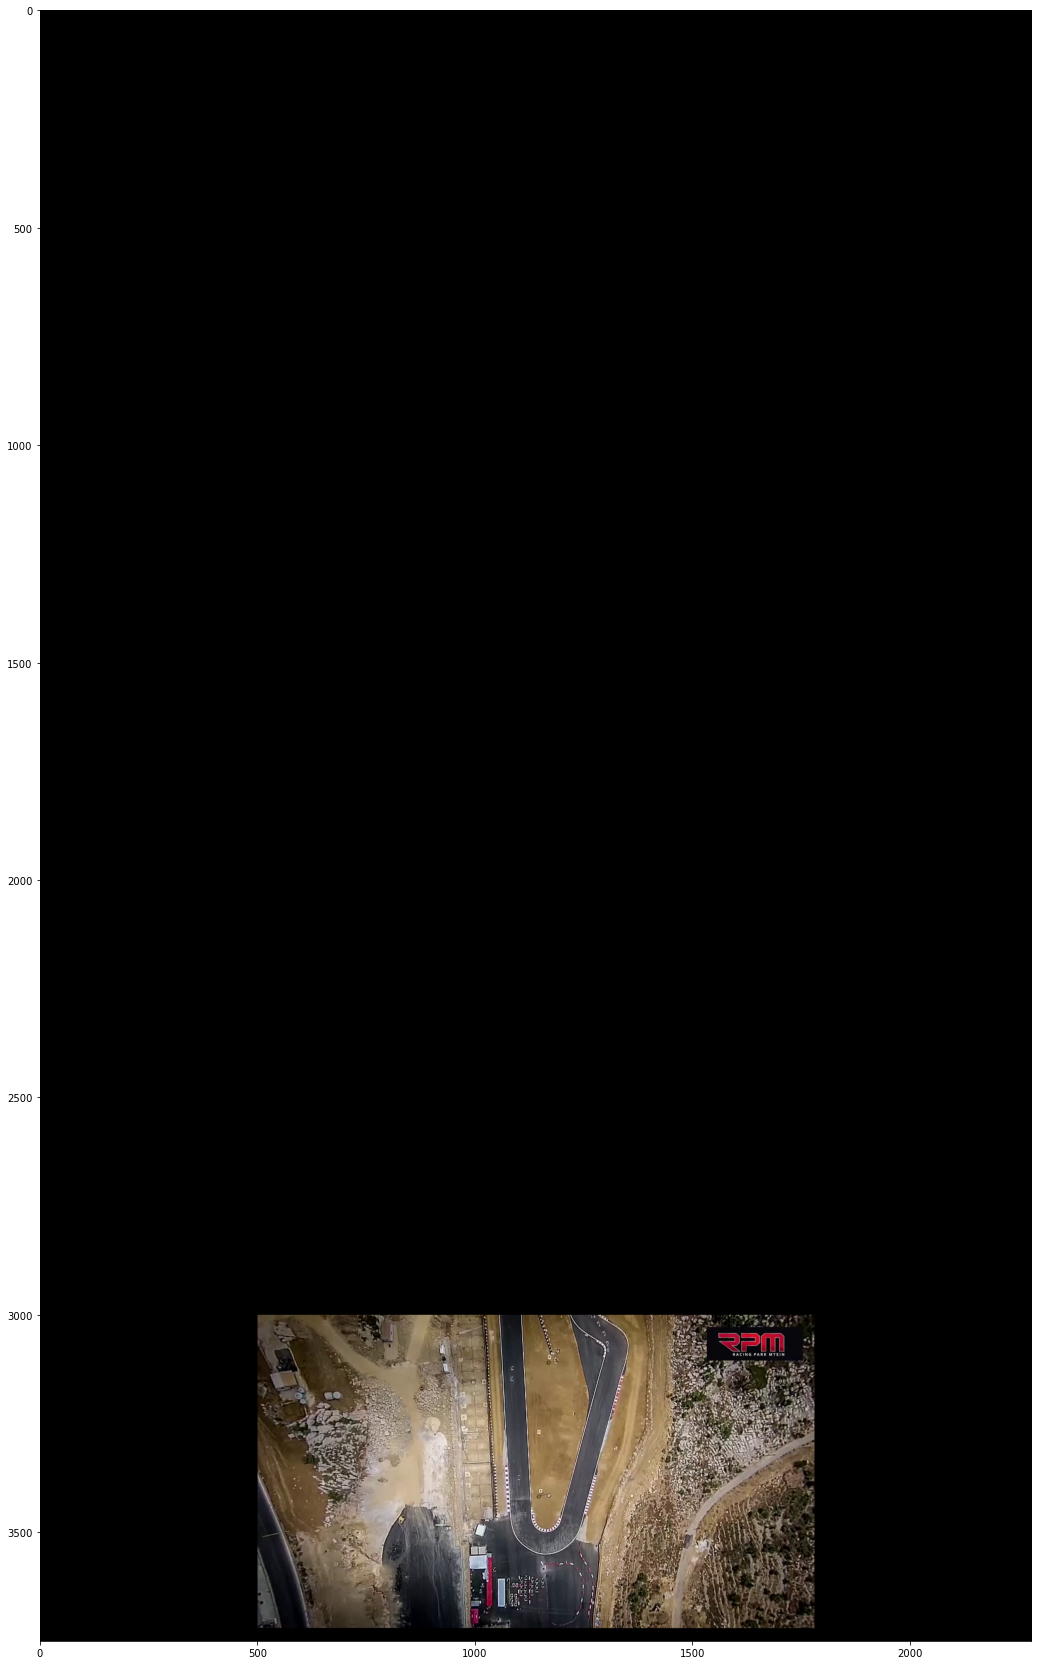

In [14]:
pano10_0 = cv2.addWeighted(new_frame_0,0.5,new_frame_10,0.5,0)
pano10_0 = np.maximum(new_frame_0,new_frame_10)
plt.figure(figsize=(30,30))
plt.imshow(pano10_0)

In [15]:
new_frame_20 = cv2.warpPerspective(frames_interval_10_RGB[2], anyFrame_to_firstFrame_matrices[1], pano_shape)
print(new_frame_20.shape)

pano20_0 = cv2.addWeighted(pano10_0,0.5,new_frame_20,0.5,0)
pano20_0 = np.maximum(pano10_0,new_frame_20)

(3750, 2280, 3)


In [16]:
new_frame_30 = cv2.warpPerspective(frames_interval_10_RGB[3], anyFrame_to_firstFrame_matrices[2], pano_shape)
print(new_frame_30.shape)

pano30_0 = cv2.addWeighted(pano20_0,0.5,new_frame_30,0.5,0)
pano30_0 = np.maximum(pano20_0,new_frame_30)

(3750, 2280, 3)


In [17]:
new_frame_40 = cv2.warpPerspective(frames_interval_10_RGB[4], anyFrame_to_firstFrame_matrices[3], pano_shape)
print(new_frame_40.shape)

pano40_0 = cv2.addWeighted(pano30_0,0.5,new_frame_40,0.5,0)
pano40_0 = np.maximum(pano30_0,new_frame_40)

(3750, 2280, 3)


In [18]:
new_frame_50 = cv2.warpPerspective(frames_interval_10_RGB[5], anyFrame_to_firstFrame_matrices[4], pano_shape)
print(new_frame_50.shape)

pano50_0 = cv2.addWeighted(pano40_0,0.5,new_frame_50,0.5,0)
pano50_0 = np.maximum(pano40_0,new_frame_50)

(3750, 2280, 3)


In [19]:
new_frame_60 = cv2.warpPerspective(frames_interval_10_RGB[6], anyFrame_to_firstFrame_matrices[5], pano_shape)
print(new_frame_60.shape)

pano60_0 = cv2.addWeighted(pano50_0,0.5,new_frame_60,0.5,0)
pano60_0 = np.maximum(pano50_0,new_frame_60)

(3750, 2280, 3)


In [20]:
new_frame_70 = cv2.warpPerspective(frames_interval_10_RGB[7], anyFrame_to_firstFrame_matrices[6], pano_shape)
print(new_frame_70.shape)

pano70_0 = cv2.addWeighted(pano60_0,0.5,new_frame_70,0.5,0)
pano70_0 = np.maximum(pano60_0,new_frame_70)

(3750, 2280, 3)


In [21]:
new_frame_80 = cv2.warpPerspective(frames_interval_10_RGB[8], anyFrame_to_firstFrame_matrices[7], pano_shape)
print(new_frame_80.shape)

pano80_0 = cv2.addWeighted(pano70_0,0.5,new_frame_80,0.5,0)
pano80_0 = np.maximum(pano70_0,new_frame_80)

(3750, 2280, 3)


In [22]:
new_frame_90 = cv2.warpPerspective(frames_interval_10_RGB[9], anyFrame_to_firstFrame_matrices[8], pano_shape)
print(new_frame_90.shape)

pano90_0 = cv2.addWeighted(pano80_0,0.5,new_frame_90,0.5,0)
pano90_0 = np.maximum(pano80_0,new_frame_90)

(3750, 2280, 3)


(3750, 2280, 3)


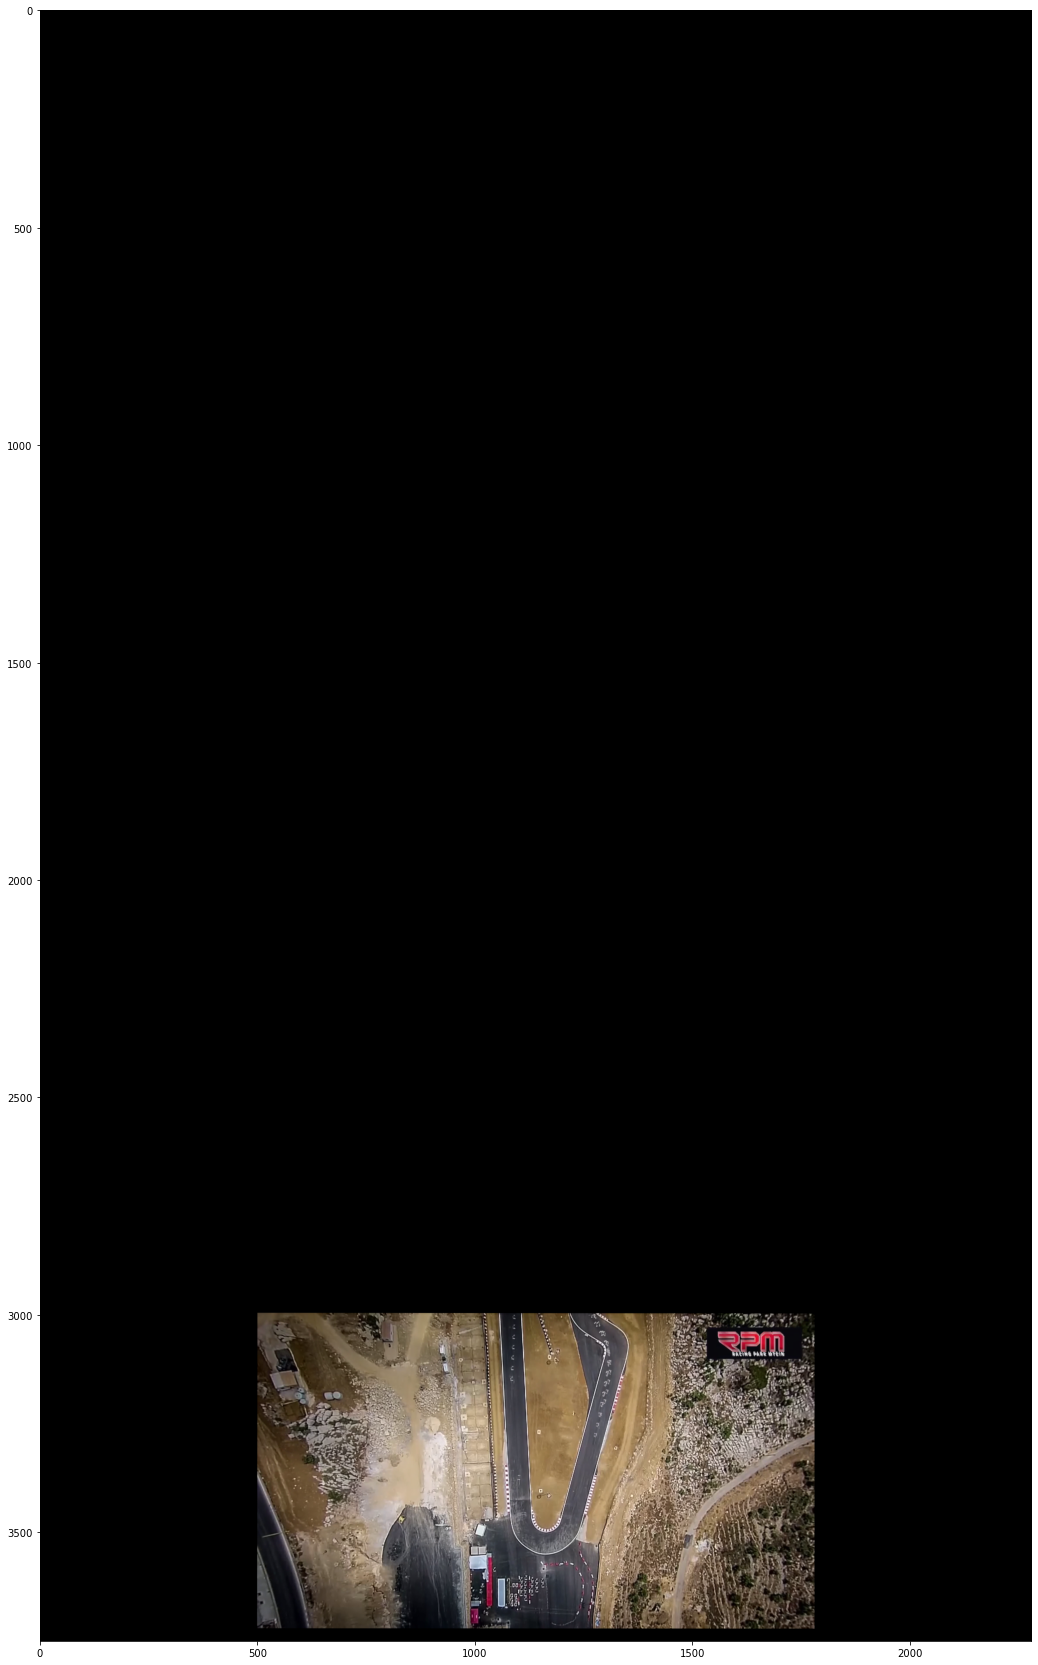

In [23]:
new_frame_100 = cv2.warpPerspective(frames_interval_10_RGB[10], anyFrame_to_firstFrame_matrices[9], pano_shape)
print(new_frame_100.shape)

pano100_0 = cv2.addWeighted(pano90_0,0.5,new_frame_100,0.5,0)
pano100_0 = np.maximum(pano90_0,new_frame_100)
plt.figure(figsize=(30,30))
plt.imshow(pano100_0)

In [24]:
# Save panos frame into a list
panos = [pano10_0,pano20_0,pano30_0,pano40_0,pano50_0,pano60_0,pano70_0,pano80_0,pano90_0,pano100_0]

In [25]:
# Save transformed frames into a list
newframes = [new_frame_0,new_frame_10,new_frame_20,new_frame_30,new_frame_40,new_frame_50,new_frame_60
            ,new_frame_70,new_frame_80,new_frame_90,new_frame_100]

In [26]:
print("There are " + str(len(frames_interval_10_RGB)) + " frames in the list ""frames_interval_10_RGB"" ")

There are 144 frames in the list frames_interval_10_RGB 


In [27]:
# """ Save to list the trasnform frames and the scaled frames to pano list"""
for i in range (11,len(frames_interval_10_RGB)): #from frame 110 to frame 1430, Jumps of 10 
    new_frame_temp = cv2.warpPerspective(frames_interval_10_RGB[i], anyFrame_to_firstFrame_matrices[i-1], pano_shape)
    newframes.append(new_frame_temp)

    pano_temp = cv2.addWeighted(panos[-1],0.5,new_frame_temp,0.5,0)
    pano_temp = np.maximum(panos[-1],new_frame_temp)
    panos.append(pano_temp)

In [28]:
print(f"pano list length: {len(panos)}")
print(f"newframes list length: {len(newframes)}")

pano list length: 143
newframes list length: 144


In [29]:
# " Save the original Panorama photo and the rotated one "
panorama_original = panos[-1].copy()
cv2.imwrite("Panorama.jpg", cv2.cvtColor(panorama_original,cv2.COLOR_RGB2BGR))
panorama_rotated = cv2.rotate(panorama_original, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite("Panorama Rotated.jpg", cv2.cvtColor(panorama_rotated,cv2.COLOR_RGB2BGR))

True

In [30]:
# Make a video of building the panorama
height, width, layers = panos[0].shape
size = (width,height)
out = cv2.VideoWriter('panos.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 10, size)

for frame in panos:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
out.release()

In [31]:
# Make a video of running transform frames
height, width, layers = newframes[0].shape
size = (width,height)
out = cv2.VideoWriter('10newframesinterval10.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 10, size)

for frame in newframes:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
out.release()

In [32]:
# """ Rotate all frames that build the panorama """

panos_rotate = []
for frame in panos:
    panos_rotate.append(cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE))

In [33]:
# """ Rotate all transformed frames """

newframes_rotate = [] 
for frame in newframes:
    newframes_rotate.append(cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE))

In [34]:
# delete useless lists
%xdel panos
%xdel newframes

In [35]:
# """ Make a video of building the panorama rotated """
height, width, layers = panos_rotate[0].shape
size = (width,height)
out = cv2.VideoWriter('panos_rotate.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 7, size)

for frame in panos_rotate:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
out.release()

In [36]:
# """ Create video that shows frames run on the panorama (interval 10) """
height, width, layers = panorama_rotated.shape
size = (width,height)
out = cv2.VideoWriter('panos_track.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 7, size)

for frame in newframes_rotate:
    temp = cv2.addWeighted(panorama_rotated,0.1,frame,0.8,0)
    out.write(cv2.cvtColor(temp, cv2.COLOR_RGB2BGR))
out.release()

# Create "Background Subtraction" Of The Video:

In [37]:
height, width, layers = panorama_rotated.shape
size = (width,height)
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('Background_Subtraction.mp4', fourcc, 10, size, 0)

cap = cv2.VideoCapture('panos_track.mp4')
ret,frameOld = cap.read()  # take first frame of the video
grayOld = cv2.cvtColor(frameOld, cv2.COLOR_RGB2GRAY)

while True:
    ret ,frameNew = cap.read()
    if ret == True:
        
        grayNew = cv2.cvtColor(frameNew, cv2.COLOR_RGB2GRAY)    
        frameDiff = cv2.absdiff(grayOld,grayNew)
        _, mask = cv2.threshold(frameDiff,10,255, cv2.THRESH_BINARY)
        cv2.imshow('Diff',frameDiff)
        out.write(frameDiff)

        grayOld = grayNew.copy(); # New ➜ Old
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break    
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1);

# Calculate Matrices For Other Frames:

In [38]:
print("There are " + str(len(anyFrame_to_firstFrame_matrices)) + "matrices for each frame the trasform it to the right place in the panorama")

There are 143matrices for each frame the trasform it to the right place in the panorama


In [39]:
"""calculate the matrices for frame 1,2,3,4,...,9
we know the matrix for the first frame (0) marices[0]
we know the matrix from frame 10 to frame 0 anyFrame_to_firstFrame_matrices[0]
so the matrix for frame 1 will be 0.9 * matrices[0] + 0.1 * anyFrame_to_firstFrame_matrices[0]
the matrix for frame 2 will be 0.8 * matrices[0] + 0.2 * anyFrame_to_firstFrame_matrices[0]
and so on...
"""

allframes_matrices_tofirst_1_9 = []
for i in range (1,10):
    left_W = (0.1 * (10-i))
    right_W = (0.1 * i)
    temp_matrix = 0
    temp_matrix = np.dot(left_W,matrices[0]) + np.dot(right_W,anyFrame_to_firstFrame_matrices[0])
    allframes_matrices_tofirst_1_9.append(temp_matrix)
len(allframes_matrices_tofirst_1_9)

9

In [40]:
"""calculate the matrices for frame 11,12,13,14,...,18,19
we know the matrix from frame 10 to frame 0 anyFrame_to_firstFrame_matrices[0]
we know the matrix from frame 20 to frame 0 anyFrame_to_firstFrame_matrices[1]
so the matrix for frame 11 will be 0.9 * anyFrame_to_firstFrame_matrices[0] + 0.1 * anyFrame_to_firstFrame_matrices[1]
the matrix for frame 12 will be 0.8 * anyFrame_to_firstFrame_matrices[0] + 0.2 * anyFrame_to_firstFrame_matrices[1]
and so on...
"""

allframes_matrices_tofirst_11_19 = []
for i in range (1,10):
    left_W = (0.1 * (10-i))
    right_W = (0.1 * i)
    temp_matrix = np.dot(left_W,anyFrame_to_firstFrame_matrices[0]) + np.dot(right_W,anyFrame_to_firstFrame_matrices[1])
    allframes_matrices_tofirst_11_19.append(temp_matrix)
len(allframes_matrices_tofirst_11_19)

9

In [41]:
allframes_matrices_tofirst_1_9.insert(0,matrices[0])
allframes_matrices_tofirst_1_9.append(anyFrame_to_firstFrame_matrices[0])
allframes_matrices_tofirst_0_10 = allframes_matrices_tofirst_1_9.copy()
%xdel allframes_matrices_tofirst_1_9
print(len(allframes_matrices_tofirst_0_10))

allframes_matrices_tofirst_11_19.append(anyFrame_to_firstFrame_matrices[1])
allframes_matrices_tofirst_11_20 = allframes_matrices_tofirst_11_19.copy()
%xdel allframes_matrices_tofirst_11_19
print(len(allframes_matrices_tofirst_11_20))

11
10


In [42]:
allframes_matrices_tofirst = allframes_matrices_tofirst_0_10.copy() + allframes_matrices_tofirst_11_20.copy()
%xdel allframes_matrices_tofirst_0_10
%xdel allframes_matrices_tofirst_11_20
len(allframes_matrices_tofirst)

21

In [43]:
"""calculate the matrices for frame 11,12,13,14,...,18,19
we know the matrix from frame 20 to frame 0 anyFrame_to_firstFrame_matrices[1]
we know the matrix from frame 30 to frame 0 anyFrame_to_firstFrame_matrices[2]
so the matrix for frame 11 will be 0.9 * frames_tanyFrame_to_firstFrame_matriceso_first[1] + 0.1 * anyFrame_to_firstFrame_matrices[2]
the matrix for frame 12 will be 0.8 * anyFrame_to_firstFrame_matrices[1] + 0.2 * anyFrame_to_firstFrame_matrices[2]
and so on...

AND FOR ALL OTHER FRAMES!!!
"""

for frameindex in range (1,142): #from 1 to 141
    for i in range (1,10):
        left_W = (0.1 * (10-i))
        right_W = (0.1 * i)
        temp_matrix = np.dot(left_W,anyFrame_to_firstFrame_matrices[frameindex]) + np.dot(right_W,anyFrame_to_firstFrame_matrices[frameindex+1])
        allframes_matrices_tofirst.append(temp_matrix)
    allframes_matrices_tofirst.append(anyFrame_to_firstFrame_matrices[frameindex+1])

In [44]:
print(len(allframes_matrices_tofirst))

# Last matrix is in index 1430
allframes_matrices_tofirst[1430]

1431


array([[ 1.75017564e+00,  4.57189261e-01, -4.82598247e+02],
       [ 1.82458201e+00,  2.69322309e+00, -2.14869355e+03],
       [ 3.90268836e-04,  6.37404668e-04,  1.76613659e-01]])

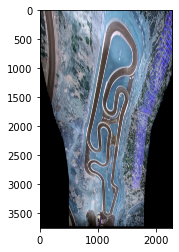

In [45]:
panorama_original = cv2.cvtColor(panorama_original,cv2.COLOR_RGB2BGR)
plt.imshow(panorama_original)

In [46]:
""" While reading the video - Transform the frame """

start = time.time()   

height, width, layers = panorama_rotated.shape
size = (width,height)
out = cv2.VideoWriter('Panorama Track with all frames.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
cap = cv2.VideoCapture('P3_racing.mov') # open video file
i  = 0

while True:
    ret, frame = cap.read()
    
    if ret==True and i<=1430:
        transformed_frame = cv2.warpPerspective(frame, allframes_matrices_tofirst[i], pano_shape)
        temp = cv2.addWeighted(panorama_original,0.1,transformed_frame,0.8,0)
        temp = cv2.rotate(temp, cv2.ROTATE_90_CLOCKWISE)
        out.write(temp)
        i += 1
    else: # (ret==False)
        break

cap.release() # closes video file
out.release()

end = time.time()
print("It took",end - start,"seconds to make the trasformed frames")

It took 215.01457500457764 seconds to make the trasformed frames


# Create "Background Subtraction" of The Full Video:

In [47]:
height, width, layers = panorama_rotated.shape
size = (width,height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('Background_Subtraction_allFrames.mp4', fourcc, 30, size, 0)

cap = cv2.VideoCapture('Panorama Track with all frames.mp4')
ret,frameOld = cap.read()  # take first frame of the video
grayOld = cv2.cvtColor(frameOld, cv2.COLOR_RGB2GRAY)

while True:
    ret ,frameNew = cap.read()
    if ret == True:
        
        grayNew = cv2.cvtColor(frameNew, cv2.COLOR_RGB2GRAY)    
        frameDiff = cv2.absdiff(grayOld,grayNew)
        _, mask = cv2.threshold(frameDiff,10,255, cv2.THRESH_BINARY)
        cv2.imshow('Diff',frameDiff)
        out.write(frameDiff)

        grayOld = grayNew.copy(); # New ➜ Old
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break    
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1);

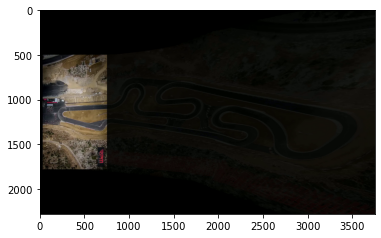

In [48]:
cap = cv2.VideoCapture('Panorama Track with all frames.mp4') # open video file
ret, first_frame = cap.read()
first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)
plt.imshow(first_frame)
cap.release()

# Creating Masks:

(2280, 3750)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x18f9a350c40>)

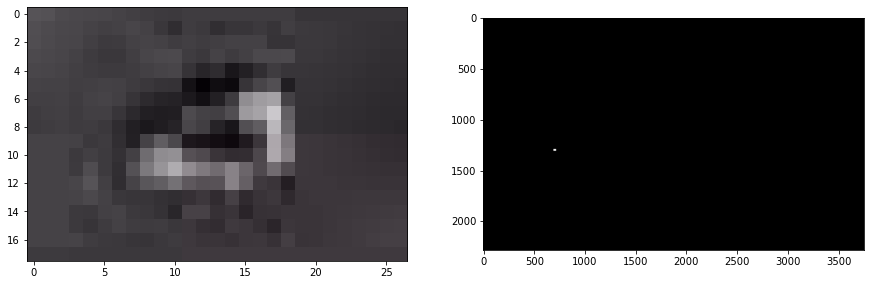

In [49]:
"*-------------- Create Masks --------------*"

plt.figure(figsize=(15,15))
mask1 = first_frame[1287:1305, 693:720]            
plt.subplot(121), plt.imshow(mask1,cmap='gray')
mask1.shape
mask1 = np.zeros(first_frame.shape[0:2])
print(mask1.shape)
mask1[1287:1305, 693:720] = 1
mask1 = mask1.astype(np.uint8)
plt.subplot(122), plt.imshow(mask1,cmap='gray')

(2280, 3750)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x18fbc9da610>)

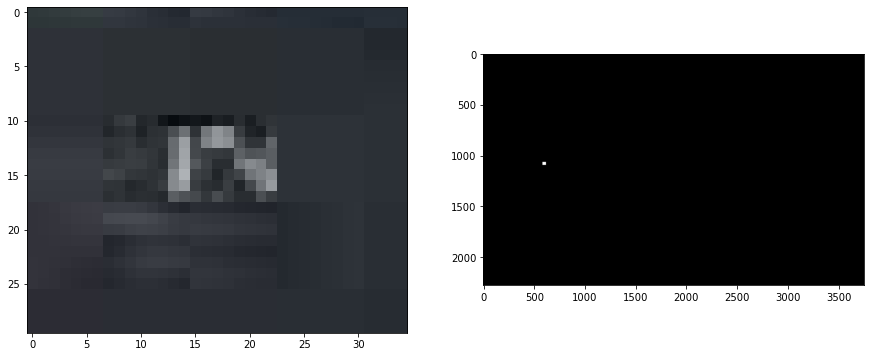

In [50]:
"*-------------- Create Masks --------------*"

plt.figure(figsize=(15,15))
mask1 = first_frame[1070:1100, 585:620]            
plt.subplot(121), plt.imshow(mask1,cmap='gray')
mask1.shape
mask1 = np.zeros(first_frame.shape[0:2])
print(mask1.shape)
mask1[1070:1100, 585:620] = 1
mask1 = mask1.astype(np.uint8)
plt.subplot(122), plt.imshow(mask1,cmap='gray')

(2280, 3750)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x18fdf4f7460>)

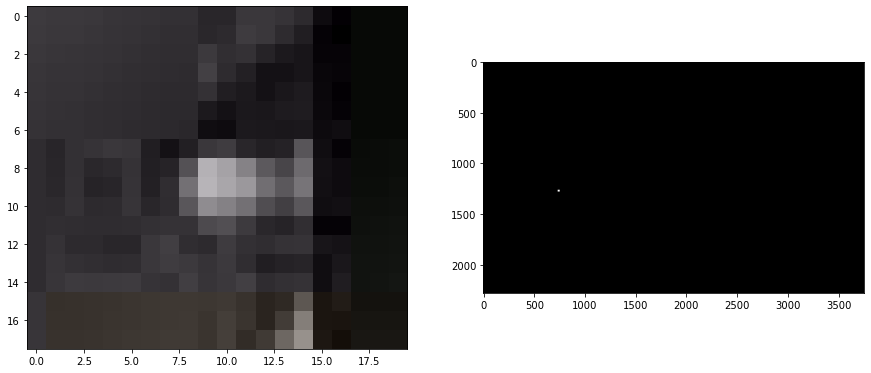

In [51]:
"*-------------- Create Masks --------------*"

plt.figure(figsize=(15,15))
mask1 = first_frame[1265:1283, 735:755]            
plt.subplot(121), plt.imshow(mask1,cmap='gray')
mask1.shape
mask1 = np.zeros(first_frame.shape[0:2])
print(mask1.shape)
mask1[1265:1283, 735:755] = 1
mask1 = mask1.astype(np.uint8)
plt.subplot(122), plt.imshow(mask1,cmap='gray')

(2280, 3750)


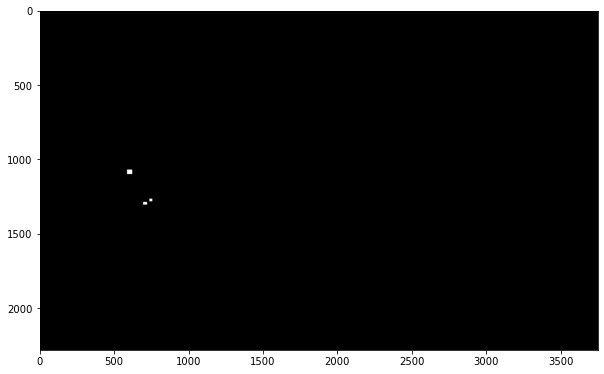

In [52]:
mask1 = np.zeros(first_frame.shape[0:2])
print(mask1.shape)
mask1[1287:1305, 693:720] = 1
mask1[1070:1100, 585:620] = 1
mask1[1265:1283, 735:755] = 1

mask1 = mask1.astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(mask1,cmap='gray')

In [53]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 14)
res, frame14 = cap.read()
plt.figure(figsize=(20,20))
# plt.imshow(frame14)
cap.release()

"*-------------- Create Masks --------------*"

mask14 = frame14[1266:1276, 735:745]  
# plt.figure(figsize=(15,15))
# plt.subplot(121), plt.imshow(mask14,cmap='gray')
mask14 = np.zeros(frame14.shape[0:2])
mask14[1266:1276, 735:745] = 1
mask14 = mask14.astype(np.uint8)
# plt.subplot(122), plt.imshow(mask14,cmap='gray')

<Figure size 1440x1440 with 0 Axes>

In [54]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 103)
res, frame103 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask103 = frame103[1270:1280, 732:745]            
# plt.figure(figsize=(10,10))
# plt.imshow(mask103,cmap='gray')
mask103 = np.zeros(frame103.shape[0:2])
mask103[1270:1280, 732:745] = 1
mask103 = mask103.astype(np.uint8)

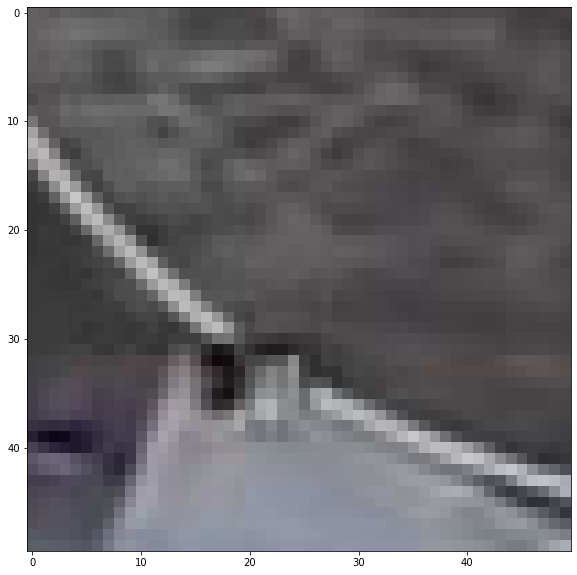

In [55]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 380)
res, frame380 = cap.read()
cap.release()

plt.figure(figsize=(10,10))
plt.imshow(frame380[1200:1250, 220:270, :], cmap='gray')

In [56]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 310)
res, frame310 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask310 = np.zeros(frame310.shape[0:2])
mask310[1105:1122,320:338] = 1 
mask310 = mask310.astype(np.uint8)
# plt.figure(figsize=(10,10))
# plt.imshow(mask310)

In [57]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 534)
res, frame534 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask534 = frame534[1242:1245, 1000:1005] 
# plt.figure(figsize=(10,10))
# plt.imshow(mask534,cmap='gray')
mask534 = np.zeros(frame534.shape[0:2])
mask534[1242:1245, 1000:1005] = 1
mask534 = mask534.astype(np.uint8)

In [58]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 560)
res, frame560 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask560 = np.zeros(frame560.shape[0:2])
mask560[1230:1240,897:917] = 1 
mask560 = mask560.astype(np.uint8)
# plt.figure(figsize=(10,10))
# plt.imshow(frame560[1230:1240,897:917,:])

In [59]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 580)
res, frame580 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask580 = np.zeros(frame580.shape[0:2])
mask580[1249:1260,1065:1085] = 1 
mask580 = mask580.astype(np.uint8)
# plt.figure(figsize=(10,10))
# plt.imshow(frame580[1249:1260,1065:1085,:])

In [60]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 596)
res, frame596 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask596 = np.zeros(frame596.shape[0:2])
mask596[1240:1250,1010:1020] = 1 
mask596 = mask596.astype(np.uint8)
# plt.figure(figsize=(10,10))
# plt.imshow(frame596[1240:1250,1010:1020,:])

In [61]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 680)
res, frame680 = cap.read()
cap.release()

"*-------------- Create Masks --------------*"

mask680 = np.zeros(frame680.shape[0:2])
mask680[1270:1285,1210:1230] = 1 
mask680 = mask680.astype(np.uint8)

# plt.figure(figsize=(10,10))
# Area to look for new points:
# plt.imshow(frame680[1270:1285,1210:1230,:])
# plt.imshow(frame680[1200:1400,400:600,:])

In [62]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 705)
res, frame705 = cap.read()
frame705 = cv2.cvtColor(frame705,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"

mask705 = np.zeros(frame705.shape[0:2])
mask705[1303:1315,645:666] = 1 
mask705 = mask705.astype(np.uint8)

# plt.figure(figsize=(10,10))
# plt.imshow(frame705[1200:1400,600:750,:]) Area to remove point
# plt.imshow(frame705[1303:1315,645:666,:]) Area to look for new point

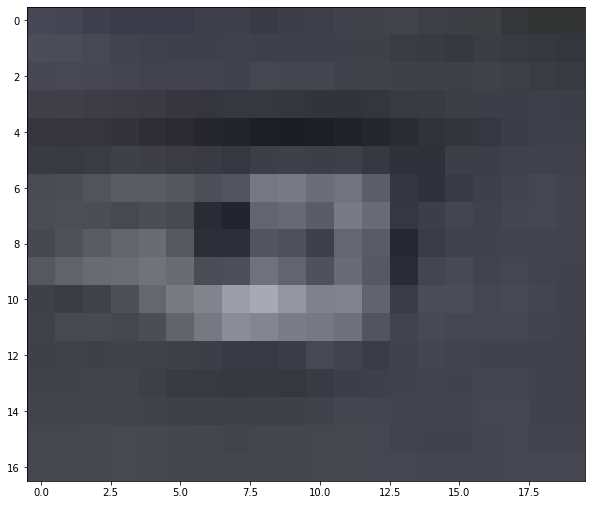

In [63]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 740)
res, frame740 = cap.read()
frame740 = cv2.cvtColor(frame740,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"


mask740 = np.zeros(frame740.shape[0:2])
mask740[1243:1260,1000:1020] = 1 
mask740 = mask740.astype(np.uint8)

# remove point in this area:
# plt.imshow(frame740[1200:1400,500:750,:]) 
# plt.imshow(frame740[900:1000,1000:1150,:]) 
# plt.imshow(frame740[1200:1400,1000:1100,:]) 

# Area to look for new point
plt.figure(figsize=(10,10))
plt.imshow(frame740[1243:1260,1000:1020,:]) 

In [64]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 760)
res, frame760 = cap.read()
frame760 = cv2.cvtColor(frame760,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"

mask760 = np.zeros(frame760.shape[0:2])
mask760[997:1010,1087:1100] = 1 
mask760 = mask760.astype(np.uint8)

# Area to look for new point
# plt.figure(figsize=(10,10))
# plt.imshow(frame760[997:1010,1087:1100,:]) 

In [65]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 830)
res, frame830 = cap.read()
frame830 = cv2.cvtColor(frame830,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"

plt.figure(figsize=(10,10))
mask830 = np.zeros(frame830.shape[0:2])
mask830[1035:1045,1505:1530] = 1 
mask830 = mask830.astype(np.uint8)

# Area to look for new point
# plt.imshow(frame830[950:980,1090:1115,:]) 
# plt.imshow(frame830[1035:1045,1505:1530,:]) 

<Figure size 720x720 with 0 Axes>

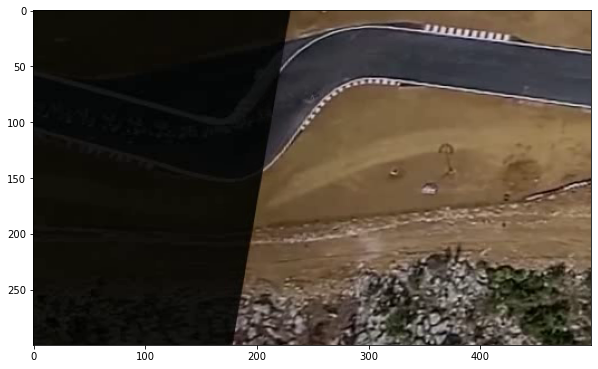

In [66]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 830)
res, frame830 = cap.read()
frame830 = cv2.cvtColor(frame830,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"

mask830 = np.zeros(frame830.shape[0:2])
mask830[1035:1045,1505:1530] = 1 
mask830 = mask830.astype(np.uint8)

# Area to look for new point
# plt.imshow(frame830[950:980,1090:1115,:])

# remove point that in area:
plt.figure(figsize=(10,10))
plt.imshow(frame830[1200:1500,500:1000,:]) 

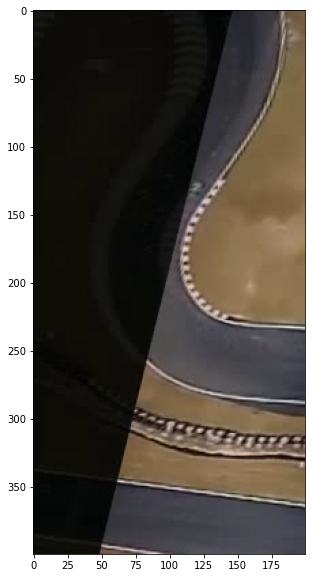

In [67]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 1020)
res, frame1020 = cap.read()
frame1020 = cv2.cvtColor(frame1020,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"

mask1020 = np.zeros(frame1020.shape[0:2])
mask1020[900:1300,1000:1200] = 1 
mask1020 = mask1020.astype(np.uint8)

# remove point that in area:
plt.figure(figsize=(10,10))
plt.imshow(frame1020[900:1300,1000:1200,:]) 

In [68]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 1045)
res, frame1045 = cap.read()
frame1045 = cv2.cvtColor(frame1045,cv2.COLOR_BGR2RGB)
cap.release()

"*-------------- Create Masks --------------*"

mask1045 = np.zeros(frame1045.shape[0:2])
mask1045[1425:1440,1955:1985] = 1 
mask1045 = mask1045.astype(np.uint8)

# remove point that in area:
# plt.figure(figsize=(10,10))
# plt.imshow(frame1045[1425:1440,1955:1985,:]) 

In [69]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 1151)
res, frame1151 = cap.read()
frame1151 = cv2.cvtColor(frame1151,cv2.COLOR_BGR2RGB)
cap.release()

# remove point that in area:
# plt.imshow(frame1151) 
# plt.figure(figsize=(10,10))
# plt.imshow(frame1151[900:1350,1200:1500,:]) 
# plt.imshow(frame1151[1100:1350,1200:1600,:]) 

In [70]:
cap = cv2.VideoCapture("Panorama Track with all frames.mp4")
cap.set(1, 1183)
res, frame1183 = cap.read()
frame1183 = cv2.cvtColor(frame1183,cv2.COLOR_BGR2RGB)
cap.release()

# remove point that in area:
# plt.figure(figsize=(10,10))
# plt.imshow(frame1183) 
# plt.imshow(frame1183[1200:1500,1350:1650,:]) 
# plt.imshow(frame1183[500:1900,500:1700,:]) 

In [71]:
def draw_on_panorama(pts, panorama,colors):
#     colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255)]
    for i in range (pts.shape[0]):
        c = colors[i]
        color = (int(c[0]),int(c[1]),int(c[2]))
        x = int(pts[i][0][0])
        y = int(pts[i][0][1])
        point = (x,y)
        cv2.circle(panorama,(x, y), 2, tuple(color), 2)
    return panorama

In [72]:
panorama_with_draw = panorama_rotated.copy()
height, width, layers = panorama_rotated.shape
size = (width,height)

cap_original_video = cv2.VideoCapture('P3_racing.mov')
cap = cv2.VideoCapture('Panorama Track with all frames.mp4')

out = cv2.VideoWriter('Tracking Cars.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
out_print = cv2.VideoWriter('Paint On Panorama.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)

colors = np.random.randint(0,255,(5,3))

# params for corner detection
feature_params = dict( maxCorners   = 3,
                       qualityLevel = 0.001,
                       minDistance  = 1,
                       blockSize    = 9)

feature_params_14 = dict( maxCorners   = 1,
                          qualityLevel = 0.01,
                          minDistance  = 5,
                          blockSize    = 10 )

feature_params_103 = dict( maxCorners  = 1,
                          qualityLevel = 0.001,
                          minDistance  = 5,
                          blockSize    = 3 )

feature_params_320 = dict( maxCorners  = 4,
                          qualityLevel = 0.001,
                          minDistance  = 5,
                          blockSize    = 3 )

feature_params_740 = dict( maxCorners  = 1,
                          qualityLevel = 0.001,
                          minDistance  = 5,
                          blockSize    = 3 )

# Parameters for optical flow
lk_params = dict( winSize  = (5,5),
                  maxLevel = 8,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


# Take first frame and find corners in it
ret, F0 = cap.read()
F0_gray = cv2.cvtColor(F0, cv2.COLOR_BGR2GRAY)
pts0 = cv2.goodFeaturesToTrack(F0_gray, mask = mask1, **feature_params)

trajectory_frame = draw_on_panorama(pts0,panorama_with_draw, colors)
trajectory_frame = cv2.cvtColor(trajectory_frame, cv2.COLOR_RGB2BGR)
out_print.write(trajectory_frame)
out.write(F0)

# Parameters for font
font_paramsline1 = dict(org = (100,150),
                   fontFace = cv2.MARKER_TRIANGLE_UP,
                   fontScale = 5,
                   color = (0,255,255),
                   lineType = 1,thickness=10)

font_paramsline2 = dict(org = (100,300),
                   fontFace = cv2.FONT_HERSHEY_PLAIN,
                   fontScale = 10,
                   color = (0,255,255),
                   lineType = 1,thickness=10)
                   
# Create a mask image for drawing purposes
canvas = np.zeros_like(F0)
while(1):
    ret2, original_frame = cap_original_video.read()
    ret, F1 = cap.read()
    
    if ret == True and cap.get(cv2.CAP_PROP_POS_FRAMES) <= 1314:
        
        F1_gray = cv2.cvtColor(F1, cv2.COLOR_BGR2GRAY)
  
        # calculate optical flow
        pts1, status, err = cv2.calcOpticalFlowPyrLK(F0_gray, F1_gray, pts0, None, **lk_params)
        
        # delete "failed" points (status==0)
        pts1 = pts1[status[:,0]==1]
        pts0 = pts0[status[:,0]==1]
       
        for (p0,p1) in zip(pts0,pts1):
            x0,y0 = p0.squeeze().astype(np.int)
            x1,y1 = p1.squeeze().astype(np.int)
            canvas = cv2.line(canvas, (x0,y0),(x1,y1), (0,255,255), 2) 
            F1 = cv2.circle(F1,(x1,y1),2,(0,0,255),-1) # new points
            
        # add some text:
        cv2.putText(F1,'There are ' + str(pts0.size//2) + ' CARS in the Race NOW!', **font_paramsline1) 
        cv2.putText(F1,'Frame number: ' + str(int(cap.get(cv2.CAP_PROP_POS_FRAMES))), **font_paramsline2)

        # visualize the results
        canvas = np.uint8(canvas*0.7) # fade out canvas  
        final = cv2.add(F1, canvas)
        final[int(final.shape[0])-720:, int(final.shape[1])-1280:, :] = original_frame
        cv2.imshow('final',final)
          
        # Now update the previous frame
        F0_gray = F1_gray

        # Track new points in spesific frames:
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 14:
            print("Now in frame 14")
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask14, **feature_params_14)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))

        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 103:
            print("Now in frame 103")
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask103, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))    
      
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 310:
            print("Now in frame 310")
            pts310 = pts1.copy()
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (300<pts1[i][0][0]<350 and 1100<pts1[i][0][1]<1130):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(3,1,2)
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask310, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
            
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 380:
            print("Now in frame 380")
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (220<pts1[i][0][0]<270 and 1200<pts1[i][0][1]<1250):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(3,1,2)             
        
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 560:
            print("Now in frame 560")
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask560, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))

        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 580:
            print("Now in frame 580")
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask580, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
                
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 596:
            print("Now in frame 596")
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (1000<pts1[i][0][0]<1100 and 1200<pts1[i][0][1]<1400):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(4,1,2) 
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask596, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
            
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 680:
            print("Now in frame 680")
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (400<pts1[i][0][0]<600 and 1200<pts1[i][0][1]<1400):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(4,1,2) 
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask680, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
            
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 705:
            print("Now in frame 705")
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (600<pts1[i][0][0]<750 and 1200<pts1[i][0][1]<1400):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(4,1,2) 
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask705, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
            
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 740:
            print("Now in frame 740")
            newpts1 = []
            pts740 = pts1.copy()
            for i in range (pts1.shape[0]):
               # remove point at: # 1200:1400,500:750  
                                  # 900:1000,1000:1150 
                if not (500<pts1[i][0][0]<750 and 1200<pts1[i][0][1]<1400) and not (1000<pts1[i][0][0]<1100 and 1200<pts1[i][0][1]<1400) and not (1000<pts1[i][0][0]<1150 and 900<pts1[i][0][1]<1000):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(2,1,2) 
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask740, **feature_params_740)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
        
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 760:
            print("Now in frame 760")
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask760, **feature_params_740)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
                
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 830:
            print("Now in frame 830")
            newpts1 = []
            # remove point that in area :[1200:1500,500:1000] 
            for i in range (pts1.shape[0]):
                if not (500<pts1[i][0][0]<1000 and 1200<pts1[i][0][1]<1500):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(3,1,2) 
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask830, **feature_params_103)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
        
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 1020:
            print("Now in frame 1020")
            newpts1 = []
            # remove point that in area :[900:1300,1000:1200] 
            for i in range (pts1.shape[0]):
                if not (1000<pts1[i][0][0]<1200 and 900<pts1[i][0][1]<1300):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(3,1,2)
        
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 1045:
            print("Now in frame 1045")
            new_pts = cv2.goodFeaturesToTrack(F1_gray, mask = mask1045, **feature_params_740)
            if new_pts is not None:
                pts1 = np.vstack((pts1,new_pts))
                
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 1151:
            print("Now in frame 1151")
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (1200<pts1[i][0][0]<1500 and 900<pts1[i][0][1]<1300):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(3,1,2)
        
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 1183:
            print("Now in frame 1183")
            newpts1 = []
            for i in range (pts1.shape[0]):
                if not (500<pts1[i][0][0]<1700 and 500<pts1[i][0][1]<1900):
                    newpts1.append([pts1[i][0][0],pts1[i][0][1]])
            pts1 = np.asarray(newpts1).reshape(1,1,2)      

        # Now update the previous points
        pts0 = pts1
        
        trajectory_frame = draw_on_panorama(pts0,panorama_with_draw, colors)
        trajectory_frame = cv2.cvtColor(trajectory_frame, cv2.COLOR_RGB2BGR)
        cv2.putText(trajectory_frame,'There are ' + str(pts0.size//2) + ' CARS in the Race NOW!', **font_paramsline1)
        cv2.putText(trajectory_frame,'Frame number: ' + str(int(cap.get(cv2.CAP_PROP_POS_FRAMES))), **font_paramsline2)
        
        out_print.write(trajectory_frame)
        out.write(final)
        cv2.imshow('trajectory_frame',trajectory_frame)
    
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
            
    else: # no frames to read
        break

cv2.destroyAllWindows()
cap.release()
out.release()
cap_original_video.release()
out_print.release()
cv2.waitKey(1)

Now in frame 14
Now in frame 103
Now in frame 310
Now in frame 380
Now in frame 560
Now in frame 580
Now in frame 596
Now in frame 680
Now in frame 705
Now in frame 740
Now in frame 760
Now in frame 830
Now in frame 1020
Now in frame 1045
Now in frame 1151
Now in frame 1183


-1

# Links I used:

1. Recorded class lectures of Jonathan Rubin

2. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html

3. https://nanonets.com/blog/optical-flow/

4. https://docs.opencv.org/master/d4/d8c/tutorial_py_shi_tomasi.html